# `dask.delayed`: processes vs threads

Here we use a (quite ineficient) python implementation of the euclidean distance matrix to understand how `dask.delayed` behaves with python code. Remember that before, what we run with `dask.delayed` was Scipy's `cdist` function.

In [1]:
import dask
import numpy as np

In [2]:
def euclidean_distance_matrix(x, y):
    num_samples = x.shape[0]
    dist_matrix = np.empty((num_samples, num_samples))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            diff = xi - yj
            dist_matrix[i][j] = diff.sum()
    return dist_matrix

In [3]:
x = np.random.random([1000, 50])

In [4]:
%%time
edm = euclidean_distance_matrix(x, x)

CPU times: user 2.71 s, sys: 11.6 ms, total: 2.72 s
Wall time: 2.72 s


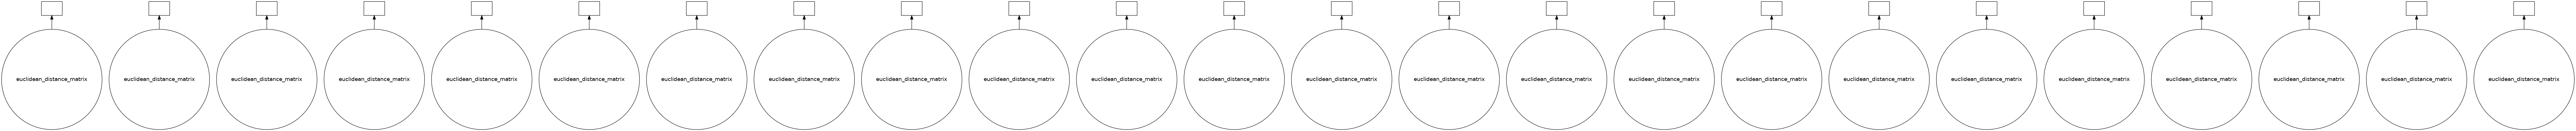

In [10]:
graph = [
    dask.delayed(euclidean_distance_matrix)(x, x),  # 1
    dask.delayed(euclidean_distance_matrix)(x, x),  # 2
    dask.delayed(euclidean_distance_matrix)(x, x),  # 3
    dask.delayed(euclidean_distance_matrix)(x, x),  # 4
    dask.delayed(euclidean_distance_matrix)(x, x),  # 5
    dask.delayed(euclidean_distance_matrix)(x, x),  # 6
    dask.delayed(euclidean_distance_matrix)(x, x),  # 7
    dask.delayed(euclidean_distance_matrix)(x, x),  # 8
    dask.delayed(euclidean_distance_matrix)(x, x),  # 9
    dask.delayed(euclidean_distance_matrix)(x, x),  # 10
    dask.delayed(euclidean_distance_matrix)(x, x),  # 11
    dask.delayed(euclidean_distance_matrix)(x, x),  # 12
    
    dask.delayed(euclidean_distance_matrix)(x, x),  # 1
    dask.delayed(euclidean_distance_matrix)(x, x),  # 2
    dask.delayed(euclidean_distance_matrix)(x, x),  # 3
    dask.delayed(euclidean_distance_matrix)(x, x),  # 4
    dask.delayed(euclidean_distance_matrix)(x, x),  # 5
    dask.delayed(euclidean_distance_matrix)(x, x),  # 6
    dask.delayed(euclidean_distance_matrix)(x, x),  # 7
    dask.delayed(euclidean_distance_matrix)(x, x),  # 8
    dask.delayed(euclidean_distance_matrix)(x, x),  # 9
    dask.delayed(euclidean_distance_matrix)(x, x),  # 10
    dask.delayed(euclidean_distance_matrix)(x, x),  # 11
    dask.delayed(euclidean_distance_matrix)(x, x),  # 12
]


dask.visualize(graph)

In [11]:
%%time
edm = dask.compute(graph, scheduler='threads')

CPU times: user 1min 8s, sys: 1.7 s, total: 1min 10s
Wall time: 1min 7s


In [12]:
%%time
edm = dask.compute(graph, scheduler='processes')

CPU times: user 133 ms, sys: 275 ms, total: 408 ms
Wall time: 18.6 s
